# Student-Stress-Factors-ML-Study
CS425 (Machine Learning) Final Project

by Manan Patel, Zachary Perry

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
slf_df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# First glance at the data

In [4]:
slf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
slf_df.describe().round(2)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,...,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00
mean,11.06,17.78,0.49,12.56,2.51,2.18,2.66,2.75,2.65,2.52,...,2.77,2.77,2.62,2.65,2.65,1.88,2.73,2.77,2.62,1.00
std,6.12,8.94,0.50,7.73,1.41,0.83,1.55,1.40,1.33,1.12,...,1.43,1.41,1.32,1.38,1.53,1.05,1.43,1.42,1.53,0.82
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,11.00,0.00,6.00,1.00,1.00,1.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,0.00
50%,11.00,19.00,0.00,12.00,3.00,2.00,2.50,3.00,3.00,2.00,...,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.50,3.00,1.00
75%,16.00,26.00,1.00,19.00,3.00,3.00,4.00,4.00,3.00,3.00,...,4.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,2.00
max,21.00,30.00,1.00,27.00,5.00,3.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,3.00,5.00,5.00,5.00,2.00


In [6]:
# check for na values
slf_df.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

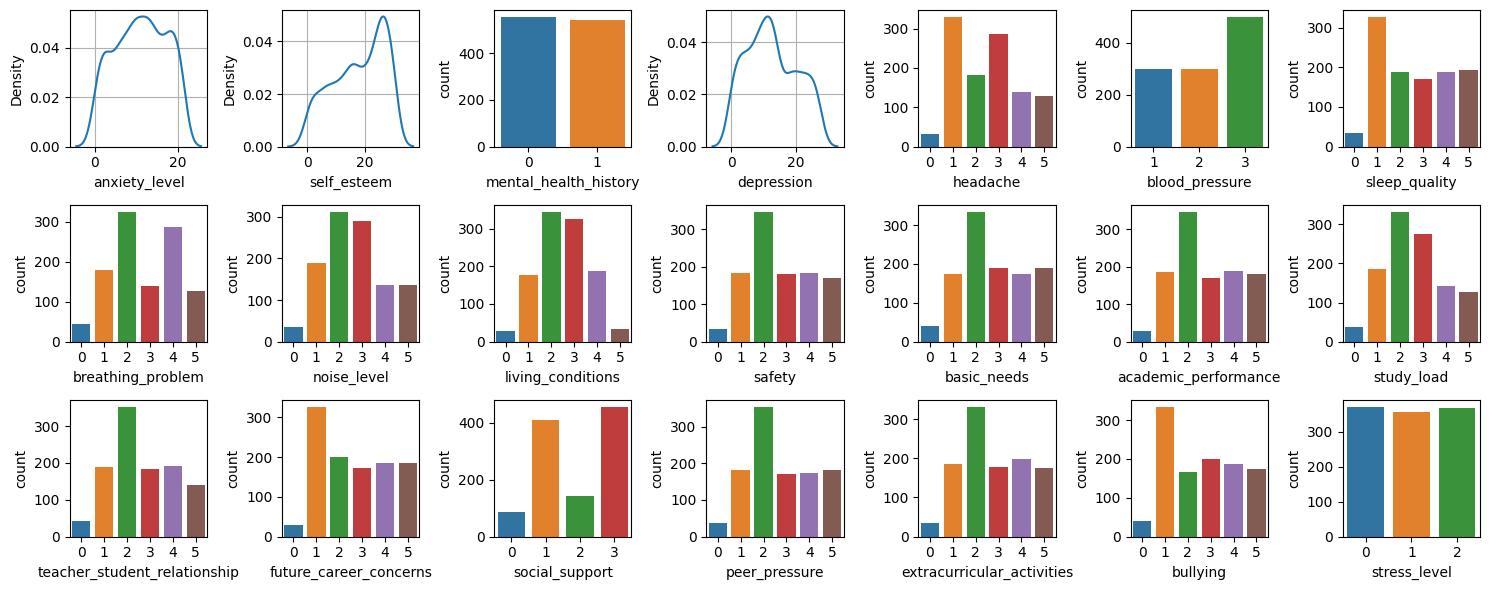

In [7]:
plt.rcParams['figure.figsize']=[15,6]
r=3
c=7
it=1
for i in slf_df.columns:
    plt.subplot(r,c,it)
    if slf_df[i].nunique()>6:
        sns.kdeplot(slf_df[i])
        plt.grid()
    else:
        sns.countplot(x=slf_df[i])
    it+=1
plt.tight_layout()
plt.show()

## Note:
No missing values or duplicate values, thus Preprocessing is not necessary for this dataset.

# Statistical analysis of features

#### Differences in anxiety levels based on academic performance

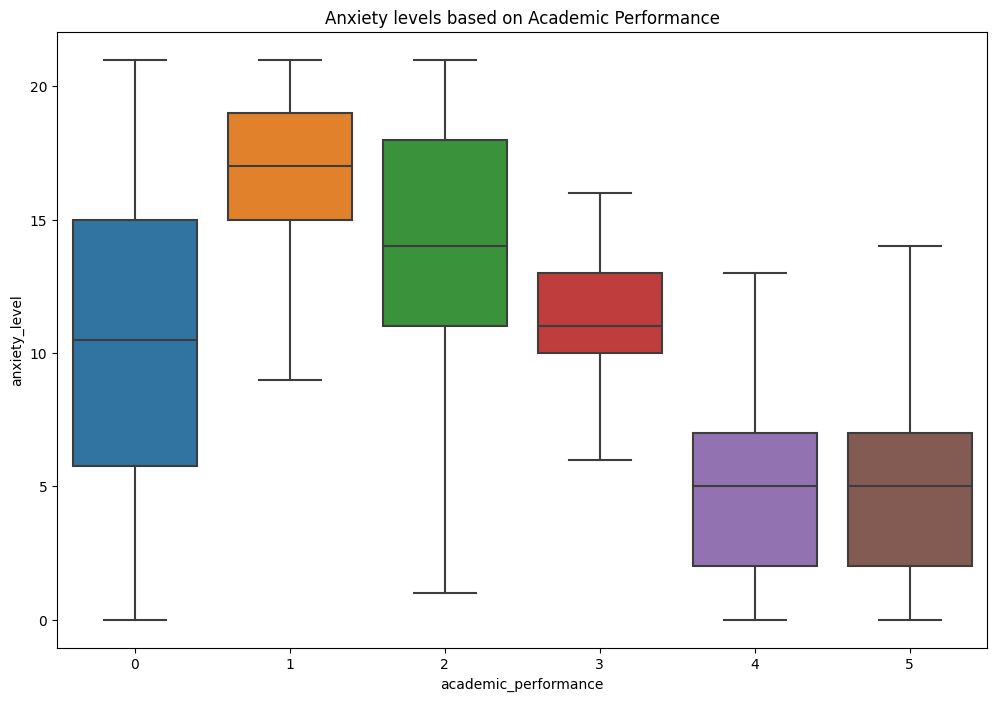

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='academic_performance', y='anxiety_level', data=slf_df, showfliers=False)
plt.title('Anxiety levels based on Academic Performance')
plt.show()

#### What is the average study load reported by students?

In [9]:
print("The average study load reported by the students is ", round(slf_df["study_load"].mean(),2)," on a range of 0-5.", sep = "")

The average study load reported by the students is 2.62 on a range of 0-5.


#### What percentage of students have experienced bullying?

In [10]:
bullying_scale = slf_df['bullying'].unique()
print(f'Bullying experienced scale: {np.sort(bullying_scale)}')

# Any amount of bullying is included in the results
bullied_students = len(slf_df[slf_df['bullying']>0])

print(f'Number of bullied students: {round((bullied_students/slf_df.shape[0])*100, 2)}%')

Bullying experienced scale: [0 1 2 3 4 5]
Number of bullied students: 96.45%


## Create correlation matrix and heatmap

#### Which factors contribute most significantly to predicting stress levels in students?

stress_level                    1.000000
self_esteem                     0.756195
bullying                        0.751162
sleep_quality                   0.749068
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
academic_performance            0.720922
headache                        0.713484
safety                          0.709602
basic_needs                     0.708968
extracurricular_activities      0.692977
peer_pressure                   0.690684
teacher_student_relationship    0.680163
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
social_support                  0.632497
living_conditions               0.581723
breathing_problem               0.573984
blood_pressure                  0.394200
Name: stress_level, dtype: float64


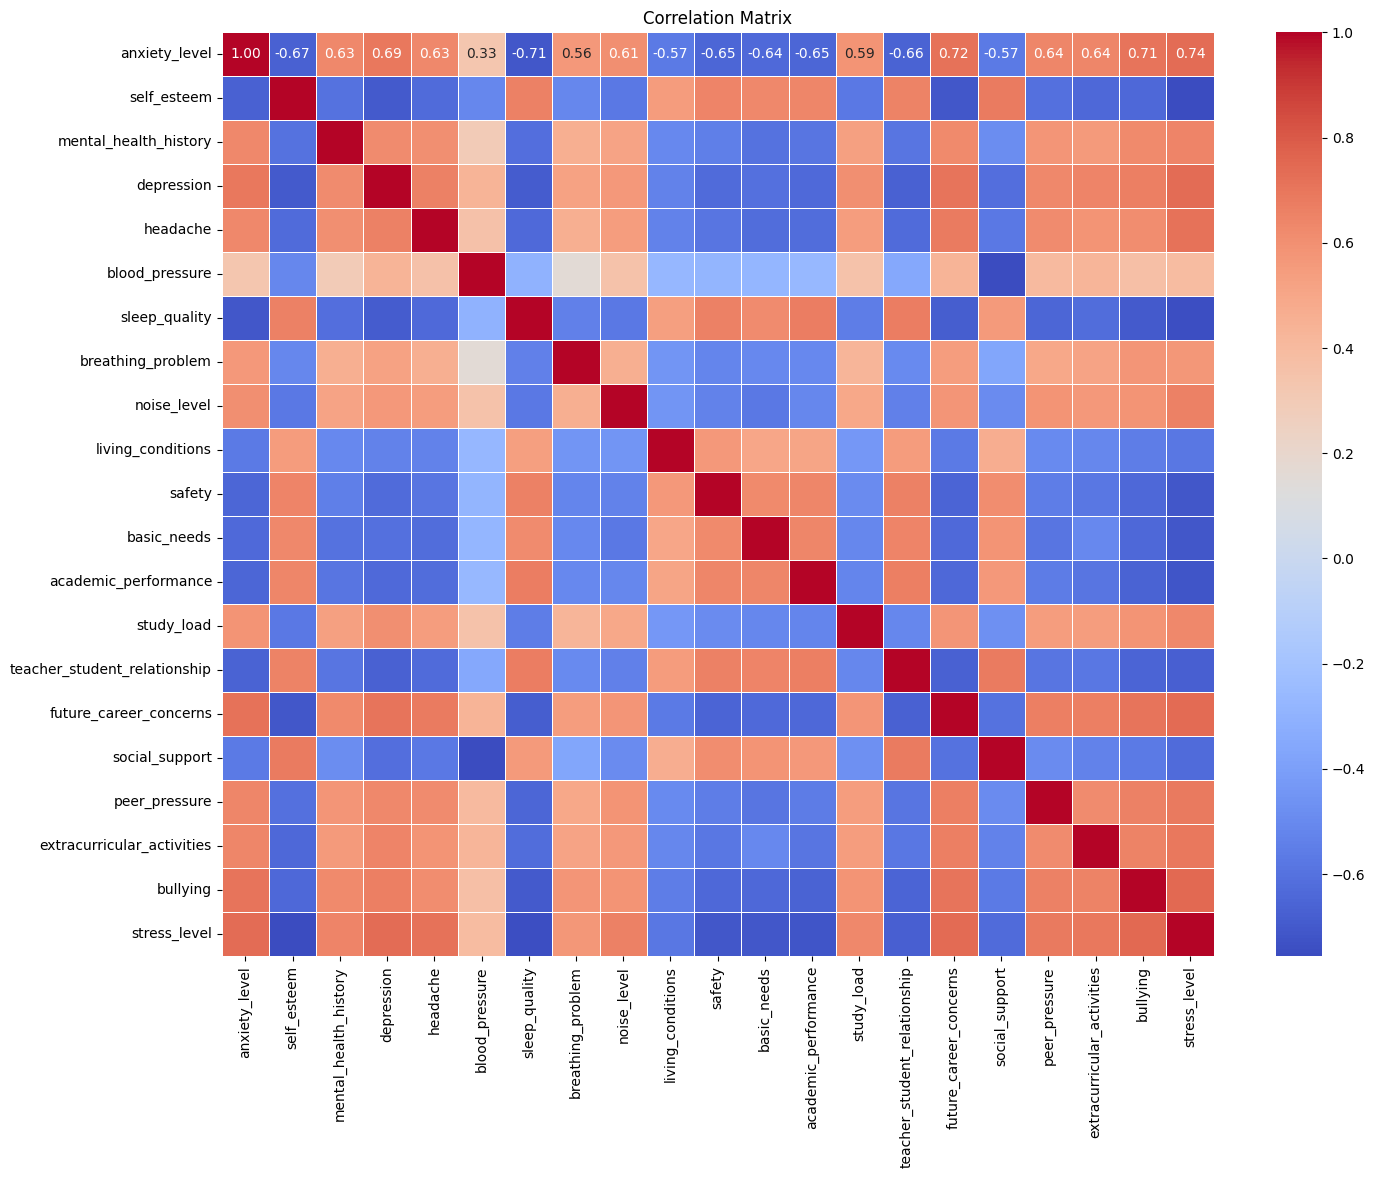

In [11]:
corr = slf_df.corr()

# print correlation for stress_level
print(np.abs(corr['stress_level']).sort_values(ascending=False))

# plot correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
highest_corr = np.abs(corr['stress_level'].drop('stress_level')).idxmax()
lowest_corr = np.abs(corr['stress_level']).idxmin()
print(f"Highest correlated variable with stress_level: {highest_corr}")
print(f"Lowest correlated variable with stress_level: {lowest_corr}")

Highest correlated variable with stress_level: self_esteem
Lowest correlated variable with stress_level: blood_pressure


> Self esteem, bullying and sleep quality appear to be the most impactful factors for predicting stress levels in students

# Explore ML models

In [13]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [14]:
X = slf_df.drop(['stress_level'], axis=1)
y = slf_df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN with K-Fold Cross Validation
- Using 10 splits
- Looping from 1 to 21 for the number of neighbors
- Plot confusion matrix for both training and testing 

In [ ]:
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, train_size=0.8)
splits = KFold(n_splits=10)

for k in range(1, 30, 2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        X_sub_train = X_train[train_index]
        X_val = X_train[val_index]
        y_sub_train = y_train[train_index]
        y_val = y_train[val_index]
            
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_sub_train, y_sub_train)
        y_predict = clf.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    print("Neightbors: ", k, "Score: ", np.mean(scores))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=27)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (KNN & KFold)")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (KNN & KFold)")
plt.show()

## Multi-Layer Perceptron with KFold Cross Validation
- Try a different number of hidden layers and learning rates

In [ ]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# TRY REMOVING THIS AND SEE WHAT HAPPENS MAYBE IDK 
scaler = StandardScaler()
scaler.fit(X_train)

pre_processed_X_train = scaler.transform(X_train)
pre_processed_X_test = scaler.transform(X_test)

def cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals):
    folds = KFold(n_splits=3)
    cross_val_scores = {}
    
    for i in hidden_layer_vals:
        for j in learning_rate_vals:
            acc_scores = []
            
            for train_index, val_index in folds.split(pre_processed_X_train):
                X_sub, X_val = pre_processed_X_train[train_index], pre_processed_X_train[val_index]
                y_sub, y_val = y_train[train_index], y_train[val_index]
                
                mlp = MLPClassifier(hidden_layer_sizes=(i), learning_rate_init=j, activation='tanh', solver='sgd', random_state=42)
                mlp.fit(X_sub, y_sub)
                y_predict = mlp.predict(X_val)
                
                acc_scores.append(accuracy_score(y_val, y_predict))
        
            cross_val_scores[i,j] = np.mean(acc_scores)
    
    return cross_val_scores

def heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals):
    cross_vals_data = list(cross_val_scores.values())
    cross_vals_data = np.array(cross_vals_data)
    cross_vals_data = cross_vals_data.reshape(len(hidden_layer_vals), len(learning_rate_vals))
    
    heatmap = plt.imshow(cross_vals_data, cmap="BuGn")
    
    plt.colorbar(heatmap)
    plt.title("Average Validation Accuracy for 3 Folds")
    plt.xlabel("Learning Rates")
    plt.ylabel("Hidden Layers")
    plt.xticks(np.arange(len(learning_rate_vals)), learning_rate_vals)
    plt.yticks(np.arange(len(hidden_layer_vals)), hidden_layer_vals)
    
    for i in range(len(hidden_layer_vals)):
        for j in range(len(learning_rate_vals)):
            plt.text(j, i, f"{cross_vals_data[i][j]:.3f}", ha='center', va='center', color='black', fontsize=10)
    
    plt.plot()
    
    return None


hidden_layer_vals = [50, 100, 200, 500]
learning_rate_vals = [0.0001, 0.001, 0.01, 0.1, 1]

cross_val_scores = cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals)
display(cross_val_scores)
heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals)

In [ ]:
# [500, 200, 100] gives the best structure
"""
Use K-fold cross-validation with three folds to find the best structure of the network to use, using the previously found best initial 
learning rate and different combinations of network structures.

Args:
    pre_processed_X_train: Transformed X training data.
    y_train: Y training data.
    hidden_layer_vals: Hidden layer values to be assessed.
Returns:
    cross_val_scores: Average accuracy score across all folds for each combination.
"""
def cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals):
    folds = KFold(n_splits=3)
    cross_val_scores = {}
    
    # For each hidden_layer structure & each fold, create an MLP classifier and fit the sub training data.
    # Calculate the validation accuracy for each fold then store the mean across the folds.
    for i in hidden_layer_vals:
        acc_scores = []
        for train_index, val_index in folds.split(pre_processed_X_train):
            X_sub, X_val = pre_processed_X_train[train_index], pre_processed_X_train[val_index]
            y_sub, y_val = y_train[train_index], y_train[val_index]
                
            mlp = MLPClassifier(hidden_layer_sizes=(i[:]), learning_rate_init=0.01, activation='tanh', solver='sgd', random_state=42)
            mlp.fit(X_sub, y_sub)
            y_predict = mlp.predict(X_val)
                
            acc_scores.append(accuracy_score(y_val, y_predict))
        
        cross_val_scores[str(i)] = np.mean(acc_scores)
    
    return cross_val_scores


hidden_layer_vals = [[100], [100, 100], [100, 100, 100], [200], [200, 100], [200, 100, 100], [500], [500, 200], [500, 200, 100]]
cross_val_scores = cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals)
display(cross_val_scores)

In [ ]:

mlp = MLPClassifier(hidden_layer_sizes=(500), learning_rate_init=0.01, max_iter=1000, activation='tanh', solver='sgd', random_state=42)

# Fit and predict for the training and testing pre processed X data
mlp.fit(pre_processed_X_train, y_train)
y_pred_train = mlp.predict(pre_processed_X_train)
training_acc_score = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", training_acc_score)


y_pred_test = mlp.predict(pre_processed_X_test)
testing_acc_score = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", testing_acc_score)

# Create the confusion matrix / heatmap for the training data.
training_cm = confusion_matrix(y_train, y_pred_train, labels=mlp.classes_)
print(training_cm)
display_training_cm = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=mlp.classes_)
display_training_cm.plot()
plt.title("Training Matrix for the Classifier")
plt.show()

# Create the confusion matrix / heatmap for the testing data.
testing_cm = confusion_matrix(y_test, y_pred_test, labels=mlp.classes_)
print(testing_cm)
display_testing_cm = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=mlp.classes_)
display_testing_cm.plot()
plt.title("Testing Matrix for the Classifier")
plt.show()

## SVC Attempt


In [ ]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', C=1000, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_predict_train = svm_classifier.predict(X_train)
y_predict_test = svm_classifier.predict(X_test)

print("Training: ", accuracy_score(y_train, y_predict_train))
print("Testing: ", accuracy_score(y_test, y_predict_test))


In [ ]:
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
svm_classifier = SVC(kernel='rbf', C=100, gamma=1, random_state=42)
svm_classifier.fit(X_train, y_train)

y_predict_train = svm_classifier.predict(X_train)
y_predict_test = svm_classifier.predict(X_test)

print("Training: ", accuracy_score(y_train, y_predict_train))
print("Testing: ", accuracy_score(y_test, y_predict_test))

## Testing linear regression on all correlated features to stress level

In [15]:
def lin_reg(feature):
  fe = slf_df[feature]
  fe = fe.values.reshape(-1, 1)
  y = slf_df['stress_level']
  X_train, X_test, y_train, y_test = train_test_split(fe, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)
  
features = slf_df.columns.drop(['stress_level'])
col_scores = {}
for i in features:
  r2, mse = lin_reg(i)
  col_scores[i] = [r2, mse]

pd.DataFrame(col_scores, index=['R2', 'MSE']).T.sort_values(by='R2', ascending=False)

,R2,MSE
anxiety_level,0.648540,0.234658
sleep_quality,0.645355,0.236784
self_esteem,0.606917,0.262448
headache,0.602582,0.265342
academic_performance,0.595215,0.270261
future_career_concerns,0.584746,0.277251
bullying,0.541202,0.306323
depression,0.515983,0.323162
peer_pressure,0.495428,0.336885
basic_needs,0.488174,0.341729


> We expected linear regression to perform much better than this because of the correlation between the features that was found in corrrelation matrix. Some possible reasons might include non-linearity of the data and presence of outliers.

## Max depth tree

Decision Tree Train Accuracy: 100.0%
Decision Tree Test Accuracy: 88.0%

                         feature  importance
5                 blood_pressure    0.402118
16                social_support    0.290732
6                  sleep_quality    0.098102
19                      bullying    0.043649
7              breathing_problem    0.040255
12          academic_performance    0.021196
3                     depression    0.020850
18    extracurricular_activities    0.019703
14  teacher_student_relationship    0.015062
17                 peer_pressure    0.008769
1                    self_esteem    0.008402
8                    noise_level    0.008080
13                    study_load    0.007020
0                  anxiety_level    0.006963
10                        safety    0.003363
15        future_career_concerns    0.002327
9              living_conditions    0.001976
11                   basic_needs    0.001434
4                       headache    0.000000
2          mental_health_hi

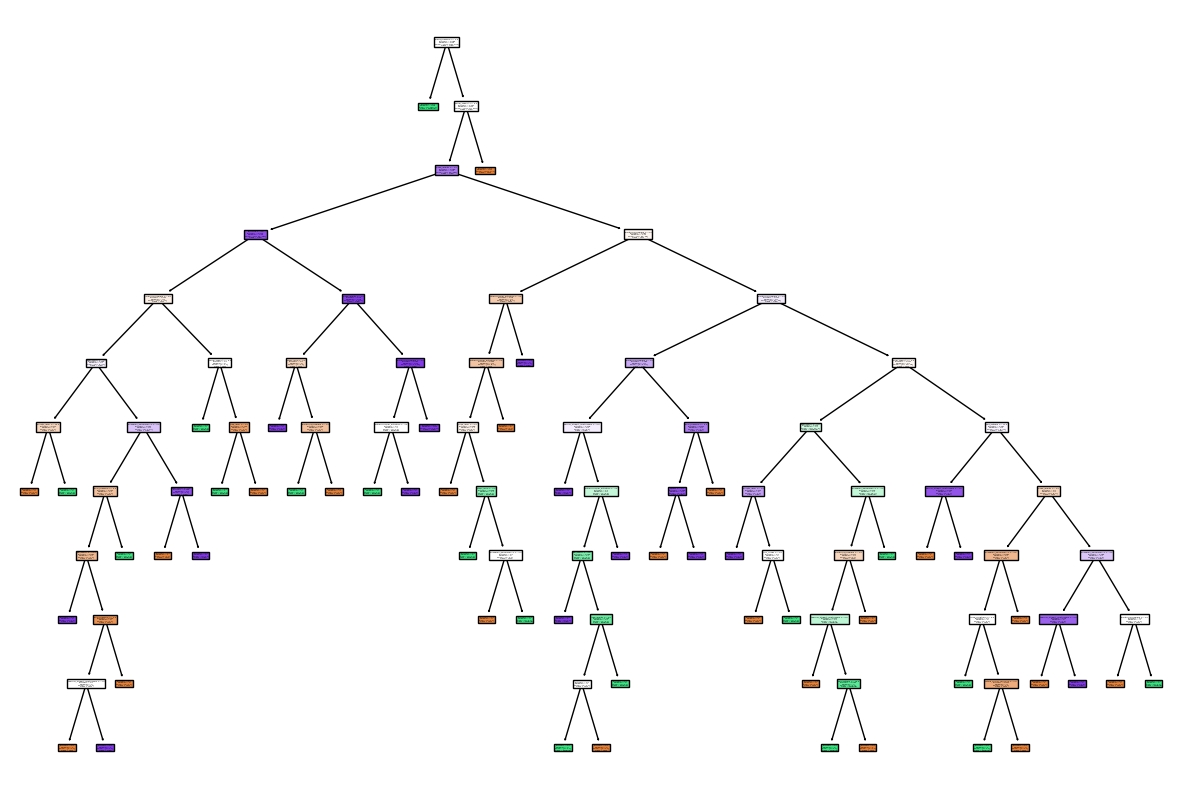

In [22]:
"""
Which factors contribute most significantly to predicting stress levels in students?
- use heatmap & correlation matrix maybe, random forest & decision trees
"""

dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print(f'Decision Tree Train Accuracy: {accuracy_score(y_train, y_train_pred).round(2)*100}%')

y_pred = dt.predict(X_test)
print(f'Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred).round(2)*100}%')
print()

fi = dt.feature_importances_
fi_df = pd.DataFrame({'feature': list(X.columns), 'importance': fi}).sort_values('importance', ascending=False)
print(fi_df)

plt.figure(figsize=(15, 10))
tree.plot_tree(dt, filled=True, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'])
plt.show()

> The max-depth decision tree is pretty good at predicting stress levels. It showed that blood pressure, sleep quality and social support were some of the best features it used to predict stress levels.

### Best Decision tree with 3-depth

Decision Tree Train Accuracy: 89.0%
Decision Tree Test Accuracy: 90.0%

                         feature  importance
5                 blood_pressure    0.533560
16                social_support    0.374551
6                  sleep_quality    0.091890
0                  anxiety_level    0.000000
11                   basic_needs    0.000000
18    extracurricular_activities    0.000000
17                 peer_pressure    0.000000
15        future_career_concerns    0.000000
14  teacher_student_relationship    0.000000
13                    study_load    0.000000
12          academic_performance    0.000000
10                        safety    0.000000
1                    self_esteem    0.000000
9              living_conditions    0.000000
8                    noise_level    0.000000
7              breathing_problem    0.000000
4                       headache    0.000000
3                     depression    0.000000
2          mental_health_history    0.000000
19                      bull

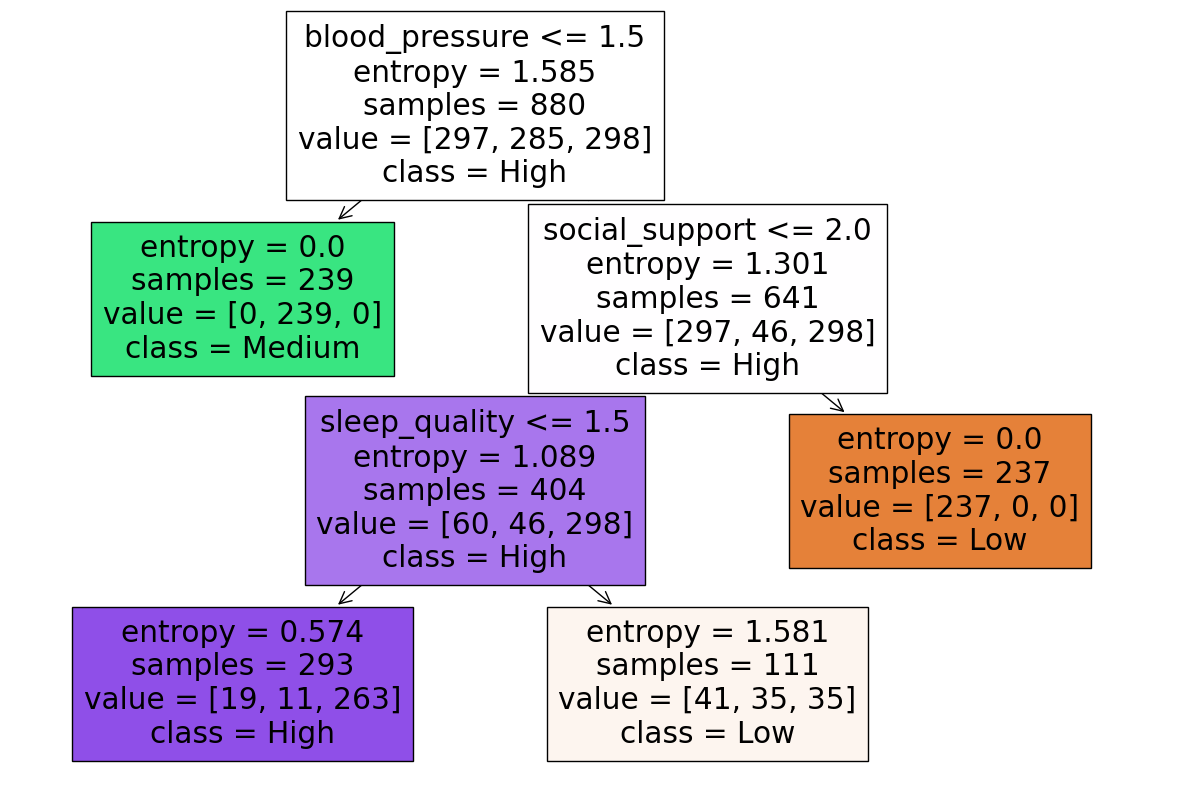

In [23]:
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
print(f'Decision Tree Train Accuracy: {accuracy_score(y_train, y_train_pred).round(2)*100}%')

y_pred = dt.predict(X_test)
print(f'Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred).round(2)*100}%')
print()

fi = dt.feature_importances_
fi_df = pd.DataFrame({'feature': list(X.columns), 'importance': fi}).sort_values('importance', ascending=False)
print(fi_df)

plt.figure(figsize=(15, 10))
tree.plot_tree(dt, filled=True, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'])
plt.show()

> A decision tree with max-depth of 3 seemed to provide best accuracy. We already knew that the three most impactful columns were blood pressure, sleep quality and social support from the max depth tree so depth-3 tree performing best makes sense.

## Let's try Random Forest classifier

Index of max score: 20


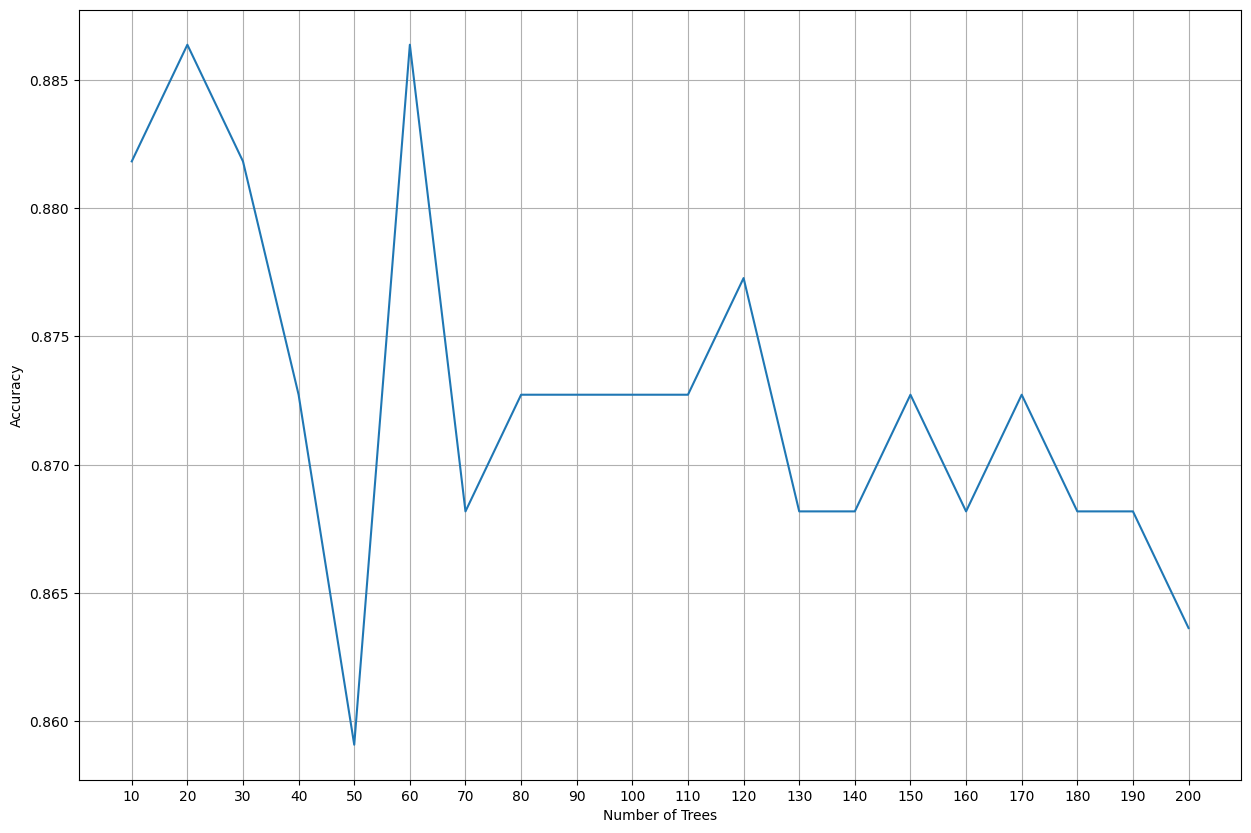

In [18]:
scores = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(f'Index of max score: {scores.index(max(scores))*10+10}')
plt.figure(figsize=(15, 10))
plt.plot(range(10, 201, 10), scores)
plt.xticks(range(10, 201, 10))
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

> Found optimal n_estimators to be 20 from tuning the hypermeters of the classifier.

In [24]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
print(f'Random Forest Train Accuracy: {accuracy_score(y_train, y_train_pred).round(2)*100}%')

y_pred = rf.predict(X_test)
print(f'Random Forest Test Accuracy: {accuracy_score(y_test, y_pred).round(2)*100}%')

Random Forest Train Accuracy: 100.0%
Random Forest Test Accuracy: 89.0%


> Trained a random forest classifier on the data to see if it performs better than the decision trees. Surprisingly, Random forest with 20 trees couldn't outperform the 3-depth decision tree. 